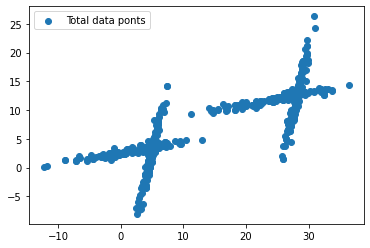

Enter n value for n groups: 4


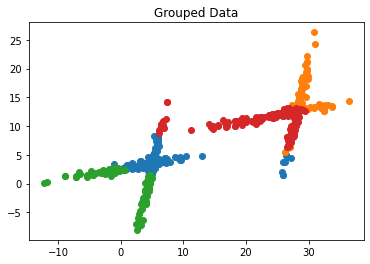

In [24]:
#1 Gaussian Mixture Model

import math as mt
import numpy as np
from matplotlib import pyplot as plt

file1 = open(r"C:\Users\lenka\Desktop\Pattern Recog\non_linearly_seperable data\Class1.txt","r+")
Lines1 = file1.readlines()
list1=[]
for line in Lines1:
    data=(line.strip())
    #print(data)
    first,sec=data.split("	")
    list1.append((float(first),float(sec)))
   

file2 = open(r"C:\Users\lenka\Desktop\Pattern Recog\non_linearly_seperable data\Class2.txt","r+")
Lines2 = file2.readlines()
list2=[]
for line in Lines2:
    data=(line.strip())
    #print(data)
    first,sec=data.split("	")
    list2.append((float(first),float(sec)))
    
traindatalist=list1[0:mt.floor(0.7*len(list1))]+list2[0:mt.floor(0.7*len(list2))]   
testdatalist1=list1[mt.ceil(0.7*len(list1)):]+list2[mt.ceil(0.7*len(list1)):]
datar=list1+list2
dataind=list(range(len(datar)))
lg=len(testdatalist1)
for i in range(lg):
    ind=np.random.choice(dataind)
    testdatalist.append(datar[ind])

    
    
#data=list1+list2
#print(data)

plt.scatter(*zip(*testdatalist),label="Total data ponts") # scatter plot of initial data
plt.legend()
plt.show()


def lf(l,i):
    li=[]
    for j in range(len(l)):
        li.append(l[j][i])
    return li

def gaussianweight(mu1,varmat,x1):
    mu2=np.array(mu1)
    mu=mu2.T
    x=np.array(x1)
    x=x.T
    #print(x,mu1)
    varmatdet=np.linalg.det(varmat)
    varmatinv=np.linalg.inv(varmat)
    m=np.dot(varmatinv,np.subtract(x,mu))
    p=np.log(varmatdet**(-0.5))-((0.5)*np.dot((x-mu).T,m))
    return p




def likelihood(means1,gdic,data,means,varmat):
    
    if means==means1:
        #print(1)
        return gdic
    else:
        
        means1=means.copy()
        #print(means1)
        #varmat=np.array([2,0,0,2]).reshape(2,2)
        for i in data:
            maxlist=[]
            #print(1)
            for j in gdic.values():
                if i in j:
                    j.remove(i)
            for k in range(len(means)):
                #print(means[k],i)
                maxlist.append(gaussianweight(means[k],varmat,i))
            #print(maxlist)
            val=max(maxlist)
            maxind=maxlist.index(val)
            key='group'+str(maxind)
            gdic[key].append(i)
        means=[]
        for i in gdic.values():
            t1=np.mean(lf(i,0))
            t2=np.mean(lf(i,1))
            tp=(t1,t2)            
            means.append(tp)
            
            sig1=np.array(lf(i,0)).var()
            sig2=np.array(lf(i,1)).var()
            #print(sig1,sig2)
            varmat=np.array([sig1,0,0,sig2]).reshape(2,2)
            
        #print(means,means1)
        likelihood(means1,gdic,data,means,varmat)
        return gdic                    

def apost(group,x1):
    x2=np.array(x1)
    x=x2.T
    sig1=np.array(lf(group,0)).var()
    sig2=np.array(lf(group,1)).var()
    m1=np.array(lf(group,0)).mean()
    m2=np.array(lf(group,1)).mean()
    mu=np.array([m1,m2])
    mu=mu.T
    varmat1=np.array([sig1,0,0,sig2]).reshape(2,2)
    varmatdet=np.linalg.det(varmat1)
    varmatinv=np.linalg.inv(varmat1)
    m=np.dot(varmatinv,np.subtract(x,mu))
    pa=len(group)/len(traindatalist)
    p=np.log(varmatdet**(-0.5))-((0.5)*np.dot((x-mu).T,m))+np.log(pa)
    return p
    
                               
n=int(input("Enter n value for n groups: "))
gdic={}
tgdic={}
means=[]
means1=[]
varmat=np.array([2,0,0,2]).reshape(2,2)
for i in range(n):
    gdic['group'+str(i)]=[]
    means.append(traindatalist[i])
                
dic_out=likelihood(means1,gdic,traindatalist,means,varmat) 
#list1=dic_out['cluster0']

for i in range(n):
    tgdic['group'+str(i)]=[]
    
for i in testdatalist:
    maxlist1=[]
    for j in dic_out.values():
        maxlist1.append(apost(j,i))
    maxindex=maxlist1.index(max(maxlist1))
    tgdic['group'+str(maxindex)].append(i)
    
        

for i in range(n):
    plt.scatter(*zip(*tgdic['group'+str(i)]))
plt.title("Grouped Data")
plt.show()


                
                
                
    
    
    
    
    
    
    